In [3]:
import pandas as pa
import matplotlib.pyplot as py
import seaborn as sns
df = pa.read_csv("house_price.csv")
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [7]:
df.shape

(13200, 7)

In [9]:
df.price_per_sqft.isnull().sum()


0

In [63]:
len(df)

13200

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_12956\2792960981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],bins = 100,kde = True)


<Axes: xlabel='price_per_sqft', ylabel='Density'>

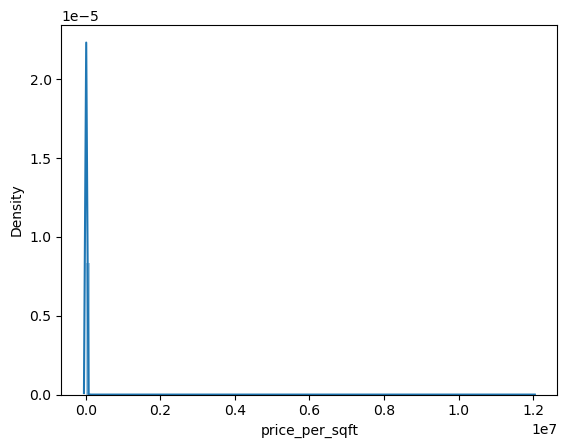

In [11]:
sns.distplot(df['price_per_sqft'],bins = 100,kde = True)

In [13]:
from scipy.stats import skew,kurtosis

In [15]:
df.price_per_sqft.skew()

108.28105529705168

In [17]:
df.price_per_sqft.skew()

108.28105529705168

In [19]:
df.price_per_sqft.kurtosis()

12095.21502832288

In [21]:
import numpy as np
df['pps1']=np.cbrt(df.price_per_sqft)

In [23]:
df['pps1'].skew()

15.55736954267158

In [149]:
df['pps1'].kurtosis()

707.0309750220296

<Axes: xlabel='pps1', ylabel='Count'>

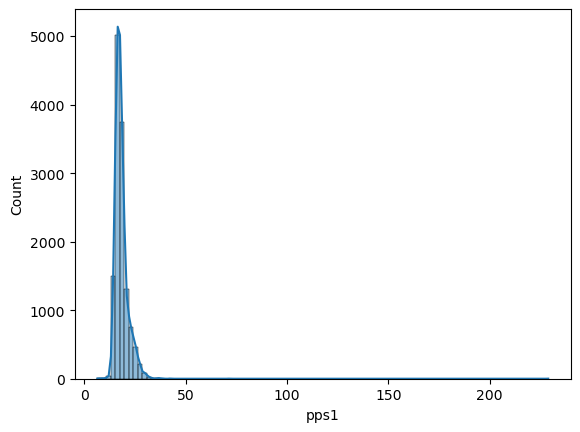

In [151]:
sns.histplot(df['pps1'],bins = 100,kde = True)

In [25]:
df['pps2'] = np.sqrt(df['pps1'])

In [27]:
df['pps2'].skew()

3.816510779829867

In [153]:
df['pps2'].kurtosis()

69.93444797017612

<Axes: xlabel='pps2', ylabel='Count'>

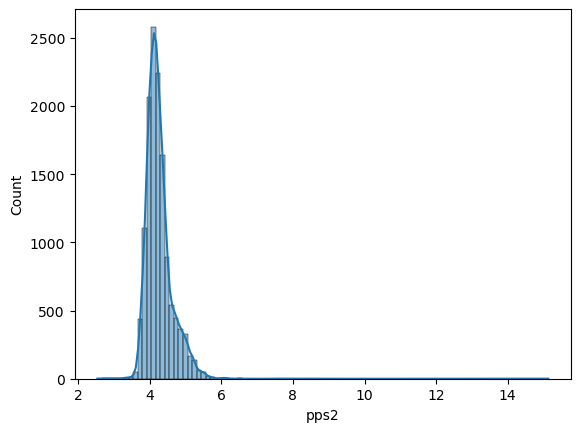

In [155]:
sns.histplot(df['pps2'],bins = 100,kde = True)

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_12956\363405805.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pps2'],bins = 100,kde = True)


<Axes: xlabel='pps2', ylabel='Density'>

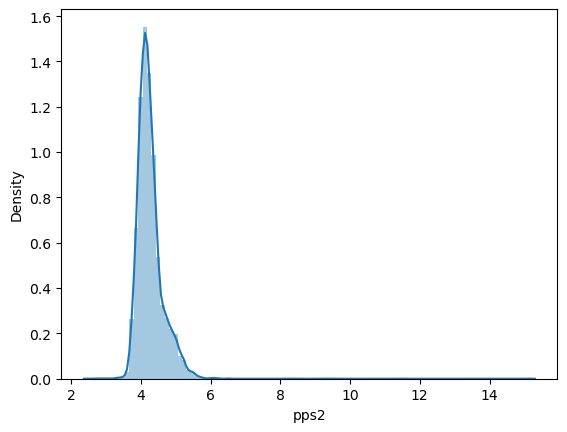

In [29]:
sns.distplot(df['pps2'],bins = 100,kde = True)

<Axes: xlabel='pps2'>

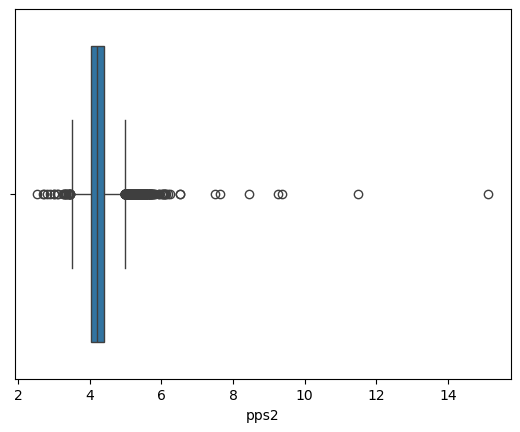

In [41]:
sns.boxplot(x = df['pps2'])

In [43]:
upper_limit = df['pps2'].mean()+3*df['pps2'].std()
lower_limit = df['pps2'].mean()-3*df['pps2'].std()
upper_limit,lower_limit

(5.395711845598828, 3.130568096450431)

In [49]:
df.loc[(df['pps2']>upper_limit) | (df['pps2']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,pps1,pps2
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,33.102832,5.753506
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,32.182872,5.672995
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,30.030709,5.480028
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,87.621958,9.360660
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371,7.185516,2.680581
...,...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,32.710663,5.719324
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,30.030709,5.480028
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,30.030709,5.480028
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,35.303483,5.941673


In [71]:
new_df = df.loc[(df['pps2']<upper_limit) & (df['pps2']>lower_limit)]


In [61]:
len(df)

13200

In [73]:
len(new_df)

13070

In [75]:
print('outliers:', len(df)-len(new_df))

outliers: 130


<Axes: xlabel='pps2'>

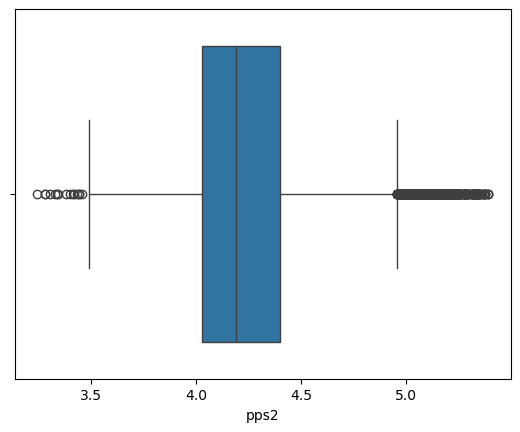

In [77]:
sns.boxplot(x =new_df['pps2'])

In [81]:
new_df = df.copy()
new_df.loc[(new_df['pps2']>upper_limit),'pps2'] = upper_limit
new_df.loc[(new_df['pps2']<lower_limit),'pps2'] = lower_limit


<Axes: xlabel='pps2'>

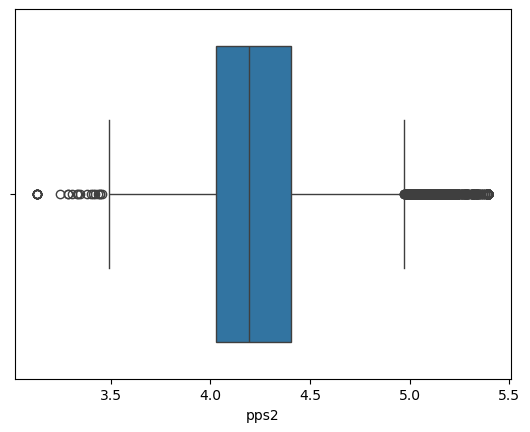

In [83]:
sns.boxplot(x =new_df['pps2'])

In [ ]:
#IQR method

In [85]:
q1 = df.pps2.quantile(0.4)
q2 = df.pps2.quantile(0.44)
iqr = q2-q1
q1,q2,iqr

(4.128764914133571, 4.151638935605407, 0.022874021471835704)

In [87]:
upper_limit = q2+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
upper_limit,lower_limit

(4.18594996781316, 4.094453881925817)

<Axes: xlabel='pps2'>

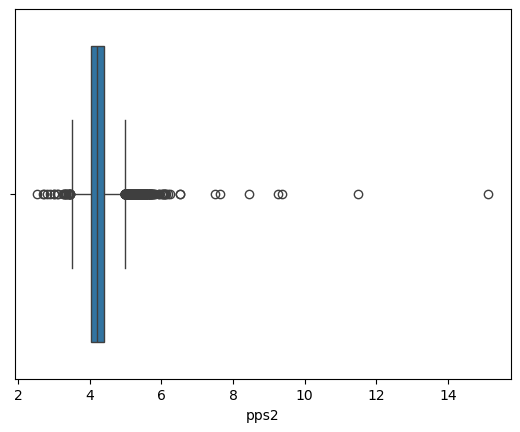

In [89]:
sns.boxplot(x =df['pps2'])

In [91]:
df.loc[(df['pps2']>upper_limit) | (df['pps2']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,pps1,pps2
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,15.465410,3.932609
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,16.649093,4.080330
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,16.267634,4.033315
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,18.415244,4.291299
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,16.198059,4.024681
...,...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,18.691223,4.323335
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,18.841714,4.340704
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,22.314357,4.723807
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,21.832754,4.672553


In [93]:
new_df = df.loc[(df['pps2']<upper_limit) & (df['pps2']>lower_limit)]

In [95]:
len(new_df)

1897

In [99]:
len(df)

13200

In [101]:
print('outliers:', len(df)-len(new_df))

outliers: 11303


<Axes: xlabel='pps2'>

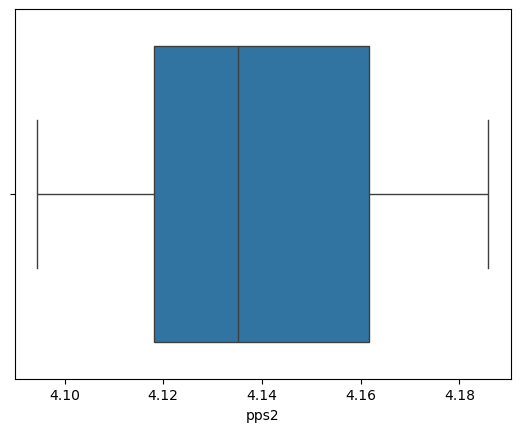

In [103]:
sns.boxplot(x =new_df['pps2'])

In [105]:
new_df = df.copy()
new_df.loc[(new_df['pps2']>upper_limit),'pps2'] = upper_limit
new_df.loc[(new_df['pps2']<lower_limit),'pps2'] = lower_limit

<Axes: xlabel='pps2'>

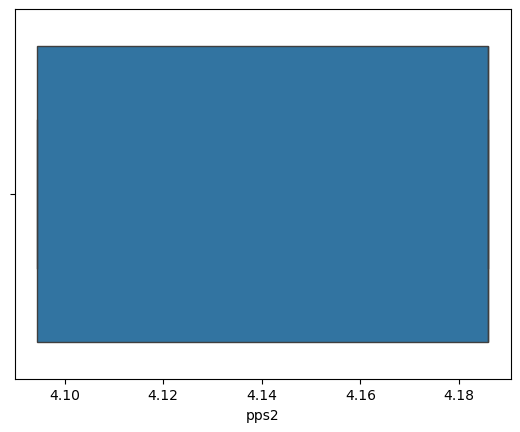

In [107]:
sns.boxplot(x =new_df['pps2'])

In [ ]:
#Percentile Method

In [127]:
upper_limit = df['pps2'].quantile(0.95)
lower_limit = df['pps2'].quantile(0.05)
upper_limit,lower_limit

(4.983170992815886, 3.8201170807271887)

<Axes: xlabel='pps2'>

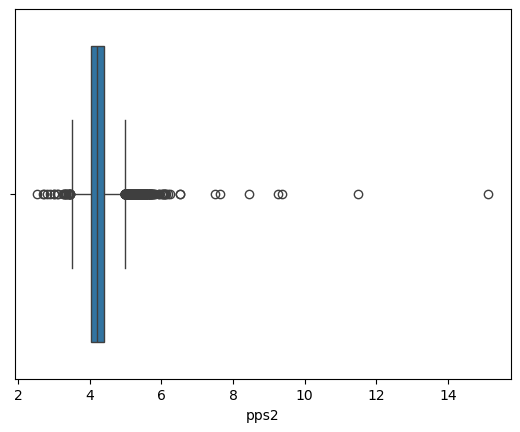

In [129]:
sns.boxplot(x =df['pps2'])

In [131]:
df.loc[(df['pps2']>upper_limit) | (df['pps2']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,pps1,pps2
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181,26.294965,5.127862
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,33.102832,5.753506
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500,13.572088,3.684031
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030,14.470411,3.803999
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,32.182872,5.672995
...,...,...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571,24.971167,4.997116
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,35.303483,5.941673
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,30.030709,5.480028
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666,25.543307,5.054039


In [133]:
new_df = df.loc[(df['pps2']<upper_limit) & (df['pps2']>lower_limit)]

In [135]:
len(new_df)

11880

In [137]:
print('outliers:', len(df)-len(new_df))

outliers: 1320


<Axes: xlabel='pps2'>

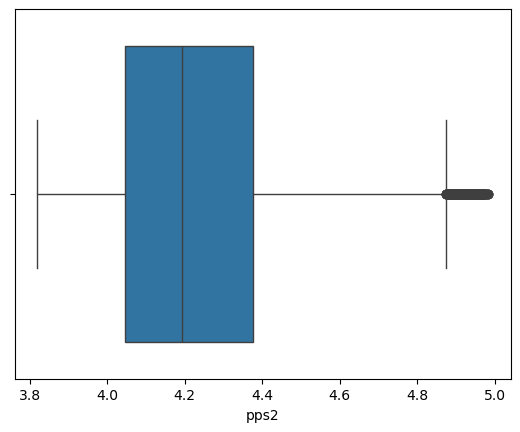

In [139]:
sns.boxplot(x =new_df['pps2'])

In [141]:
new_df = df.copy()
new_df.loc[(new_df['pps2']>upper_limit),'pps2'] = upper_limit
new_df.loc[(new_df['pps2']<lower_limit),'pps2'] = lower_limit

<Axes: xlabel='pps2'>

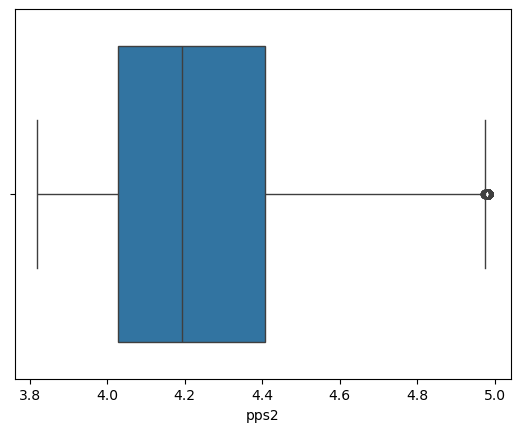

In [143]:
sns.boxplot(x =new_df['pps2'])

In [ ]:
#IQR method is the best method


<Axes: xlabel='price_per_sqft', ylabel='Count'>

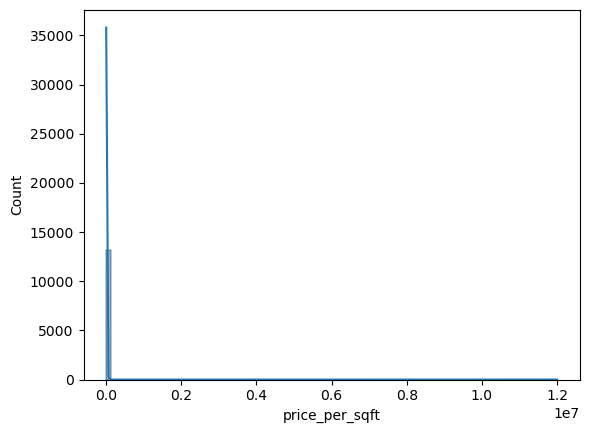

In [147]:
sns.histplot(df['price_per_sqft'],bins = 100,kde = True)

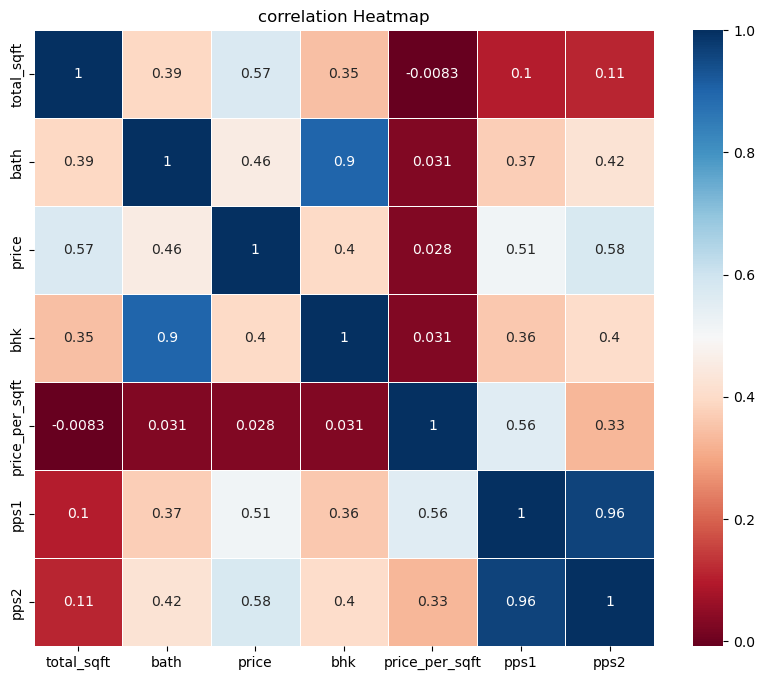

In [161]:
correlation_matrix = df.corr(numeric_only = True)
py.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = "RdBu",linewidths = 0.5)
py.title("correlation Heatmap")
py.show()


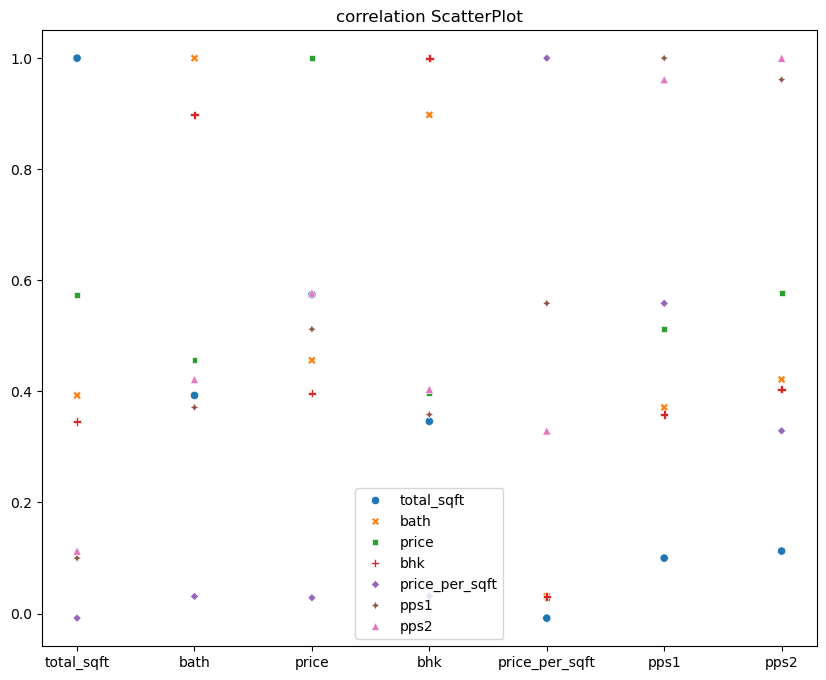

In [167]:
correlation_matrix = df.corr(numeric_only = True)
py.figure(figsize = (10,8))
sns.scatterplot(correlation_matrix)
py.title("correlation ScatterPlot")
py.show()
